# FaceBook Ad Campaign Dataset A/B Testing and Analysis

**Facebook Ad Campaign Dataset for A/B Testing**
The Facebook Ad Campaign Dataset contains data on advertisements run by a company on Facebook. It includes key metrics related to ad performance, such as impressions, clicks, spend, and conversions, making it ideal for A/B testing to evaluate ad effectiveness.

Overall, the data has **1,143 entries** and **11 columns**. A brief description for each column is given below:

- **`ad_id`**: A unique ID for each ad.
- **`campaign_id`**: An ID associated with each ad campaign of XYZ company.
- **`fb_campaign_id`**: An ID associated with how Facebook tracks each campaign.
- **`age`**: Age of the person to whom the ad is shown.
- **`gender`**: Gender of the person to whom the ad is shown.
- **`interest`**: A code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).
- **`impressions`**: The number of times the ad was shown.
- **`clicks`**: Number of clicks on that ad.
- **`spent`**: Amount paid by company XYZ to Facebook to show that ad.
- **`total_conversion`**: Total number of people who enquired about the product after seeing the ad.
- **`approved_conversion`**: Total number of people who bought the product after seeing the ad.


In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import kagglehub

In [2]:
# Download latest version
path = kagglehub.dataset_download("madislemsalu/facebook-ad-campaign")


In [3]:
df = pd.read_csv(path+'/data.csv')

In [4]:
df[755:765]

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
755,1121584,20/08/2017,20/08/2017,1178,144621,40-44,M,66,67,67,3.315400e+04,5,7.880000,1.0,1.0
756,1121585,20/08/2017,20/08/2017,1178,144621,40-44,M,66,72,68,9.773000e+03,1,1.460000,1.0,0.0
757,1121589,20/08/2017,20/08/2017,1178,144622,45-49,M,10,16,11,4.640360e+05,77,123.550000,3.0,1.0
758,1121590,20/08/2017,20/08/2017,1178,144622,45-49,M,10,16,15,4.784800e+05,75,135.750001,3.0,1.0
759,1121592,20/08/2017,20/08/2017,1178,144622,45-49,M,10,14,11,4.288120e+05,66,116.880000,4.0,2.0
760,1121593,26/08/2017,26/08/2017,1178,144622,45-49,M,10,16,16,1.177535e+06,221,365.660001,15.0,3.0
761,1121594,26/08/2017,26/08/2017,45-49,M,10,14,14,426500,72,1.282800e+02,4,1.000000,NaN,NaN
762,1121597,30/08/2017,30/08/2017,45-49,M,15,21,19,54237,7,1.078000e+01,2,1.000000,NaN,NaN
763,1121598,30/08/2017,30/08/2017,45-49,M,15,19,18,506916,89,1.337000e+02,2,2.000000,NaN,NaN
764,1121599,30/08/2017,30/08/2017,45-49,M,15,17,18,250960,42,6.488000e+01,2,0.000000,NaN,NaN


Data Set was compromised from val 760 on. It inculds columns with misaligned rows with unexpected data types , so Rows 761: are dropped. Analysis was performed on first 760 rows 

In [5]:
data = pd.read_csv(path +'/data.csv')[:761]

In [6]:
data.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0


## Exploritory Data Analysis

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                761 non-null    int64  
 1   reporting_start      761 non-null    object 
 2   reporting_end        761 non-null    object 
 3   campaign_id          761 non-null    object 
 4   fb_campaign_id       761 non-null    object 
 5   age                  761 non-null    object 
 6   gender               761 non-null    object 
 7   interest1            761 non-null    int64  
 8   interest2            761 non-null    int64  
 9   interest3            761 non-null    int64  
 10  impressions          761 non-null    float64
 11  clicks               761 non-null    int64  
 12  spent                761 non-null    float64
 13  total_conversion     761 non-null    float64
 14  approved_conversion  761 non-null    float64
dtypes: float64(4), int64(5), object(6)
memor

In [8]:
data.describe()

,ad_id,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
count,7.610000e+02,761.000000,761.000000,761.000000,7.610000e+02,761.000000,761.000000,761.000000,761.000000
mean,8.956389e+05,25.473062,28.977661,28.984231,1.031716e+05,15.340342,25.782181,2.161629,0.768725
std,1.670937e+05,15.508898,15.607548,15.604816,2.462644e+05,32.715738,57.622334,4.062201,1.656445
min,7.087460e+05,2.000000,3.000000,3.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.480860e+05,16.000000,19.000000,19.000000,3.149000e+03,0.000000,0.000000,1.000000,0.000000
50%,7.811750e+05,22.000000,26.000000,25.000000,1.219300e+04,3.000000,3.580000,1.000000,0.000000
75%,1.121184e+06,29.000000,33.000000,33.000000,8.597000e+04,14.000000,23.210000,2.000000,1.000000
max,1.121593e+06,66.000000,72.000000,72.000000,3.052003e+06,340.000000,639.949998,60.000000,21.000000


In [9]:
data.campaign_id.value_counts()

campaign_id
936     464
1178    243
916      54
Name: count, dtype: int64

There are 3 campaigns that were used: 1178, 936, 916

In [10]:
data['gender'].unique()

array(['M', 'F'], dtype=object)

There are 2 gender's present for this case study

In [11]:
data['age'].unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

4 Age group of demographics were identified for this cae study 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


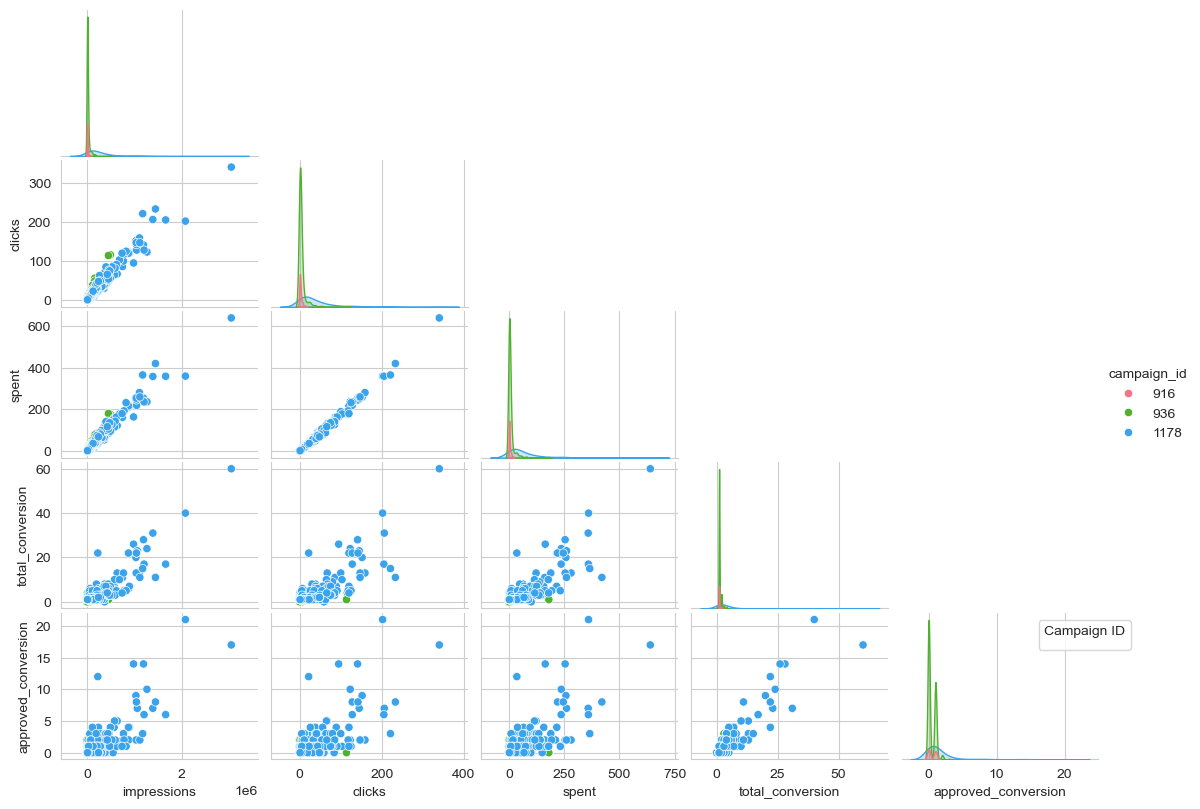

In [12]:
sb.set_style("whitegrid")
num_cols = ['impressions', 'clicks', 'spent', 'total_conversion', 'approved_conversion']
pairplot = sb.pairplot(data[num_cols + ['campaign_id']], hue='campaign_id', 
                        palette="husl", diag_kind="kde", corner=True)
pairplot.figure.set_size_inches(12, 8)
plt.legend(title="Campaign ID", loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


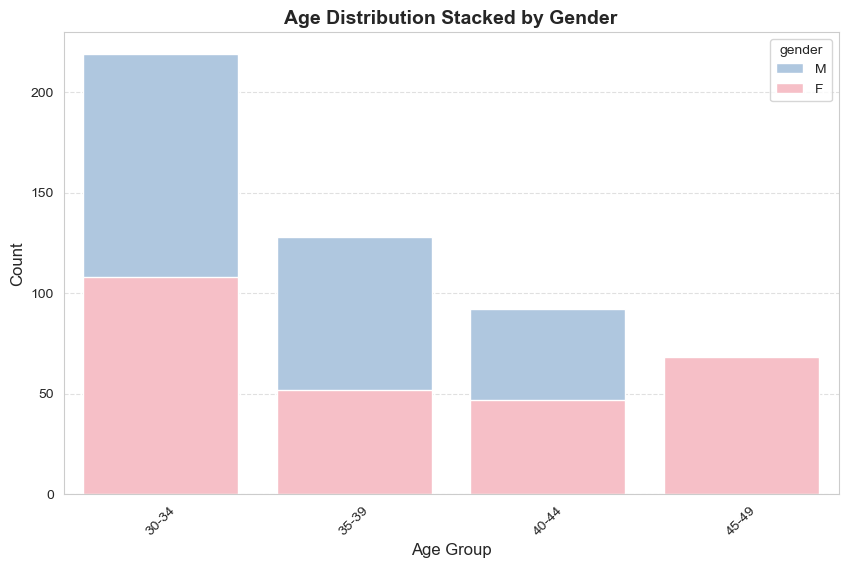

In [13]:
pastel_colors = {"M": "#A7C7E7", "F": "#FFB6C1"}  # Soft blue for males, soft pink for females
plt.figure(figsize=(10, 6))
# Create stacked bar chart for age distribution, colored by gender
sb.countplot(data=data, x='age', hue='gender', palette=pastel_colors, dodge=False)
plt.title("Age Distribution Stacked by Gender", fontsize=14, fontweight='bold')
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Gender distribution between age groups is pretty consistent, however ages 45-49 are majority female users. 

Metrics from the dataset were chosen to evaluate:
**'Spent'** as a cost metric
**'Clicks'** as a engagement metric
**'Conversion'** as a metric to determine how many users took action.

These are also used to forumlate our KPI metric later. 

In [14]:
metrics = ['spent', 'clicks', 'total_conversion']

In [15]:
#Adding Campaign IDs to a list
campaign_ids = data['campaign_id'].unique().tolist()

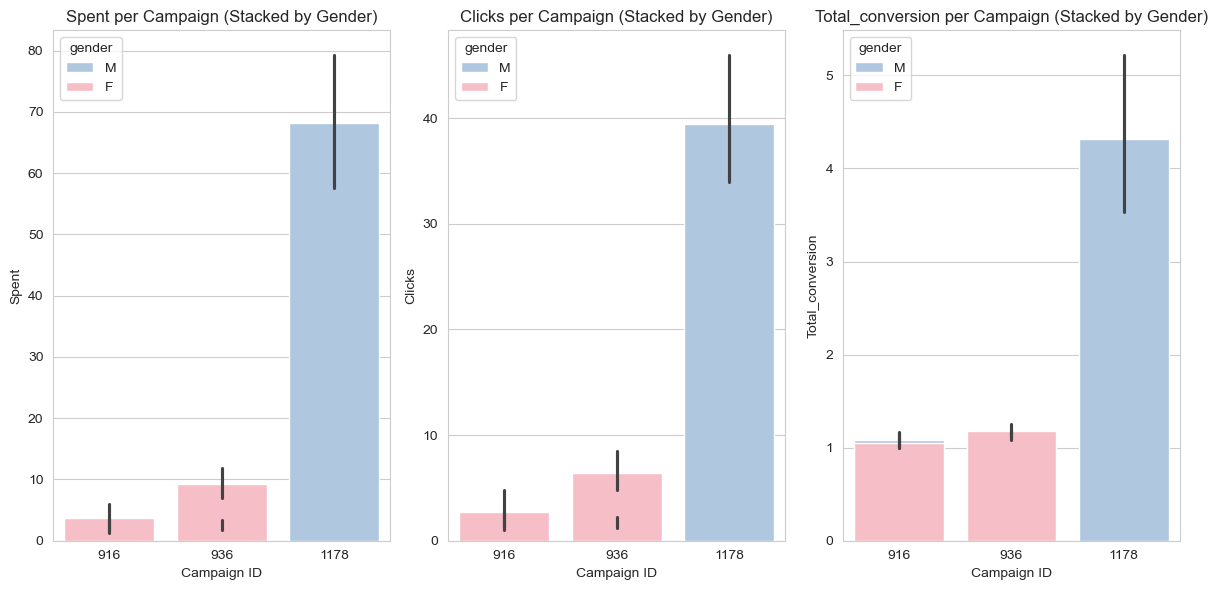

In [16]:
# Create subplots for each metric
fig, axes = plt.subplots(1, len(metrics), figsize=(12, 6))
for i, metric in enumerate(metrics): 
    sb.barplot(data=data, x='campaign_id', y=metric, hue='gender', ax=axes[i], 
               dodge=False, palette=pastel_colors)  # Stacked bars
    
    axes[i].set_title(f"{metric.capitalize()} per Campaign (Stacked by Gender)")
    axes[i].set_xlabel("Campaign ID")
    axes[i].set_ylabel(metric.capitalize())
plt.tight_layout()
plt.show()


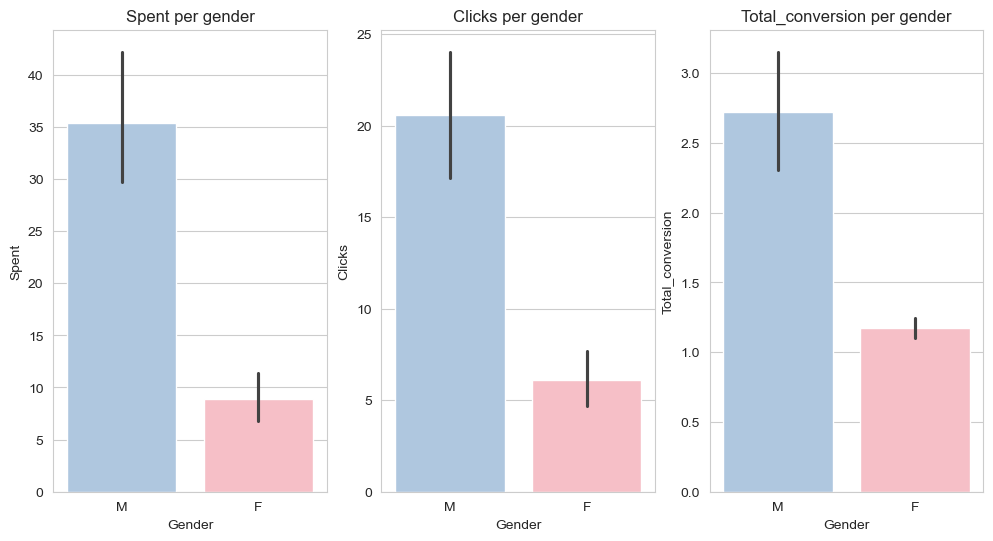

In [17]:
fig, axes = plt.subplots(1, len(metrics), figsize=(12, 6))
for  i, metric in enumerate(metrics): 
    sb.barplot(data, x= 'gender', y=metric, hue = 'gender', palette=pastel_colors, ax=axes[i])
    axes[i].set_title(f"{metric.capitalize()} per gender")
    axes[i].set_xlabel("Gender")
    axes[i].set_ylabel(metric.capitalize())

### Campaign Performance by Gender 
1. Males (M) accounted for majority of ad spending across all campaigns.
2. Campaign 1178 has the highest spent with alot allocated to M. 
3. Female spending remains low across all campaigns. 
4. Females show lower engagement in clicks and conversion rates but still remain stable across campaigns.


Futher investigation on why males show significantly higher engagement and coversion rate should be explored. 


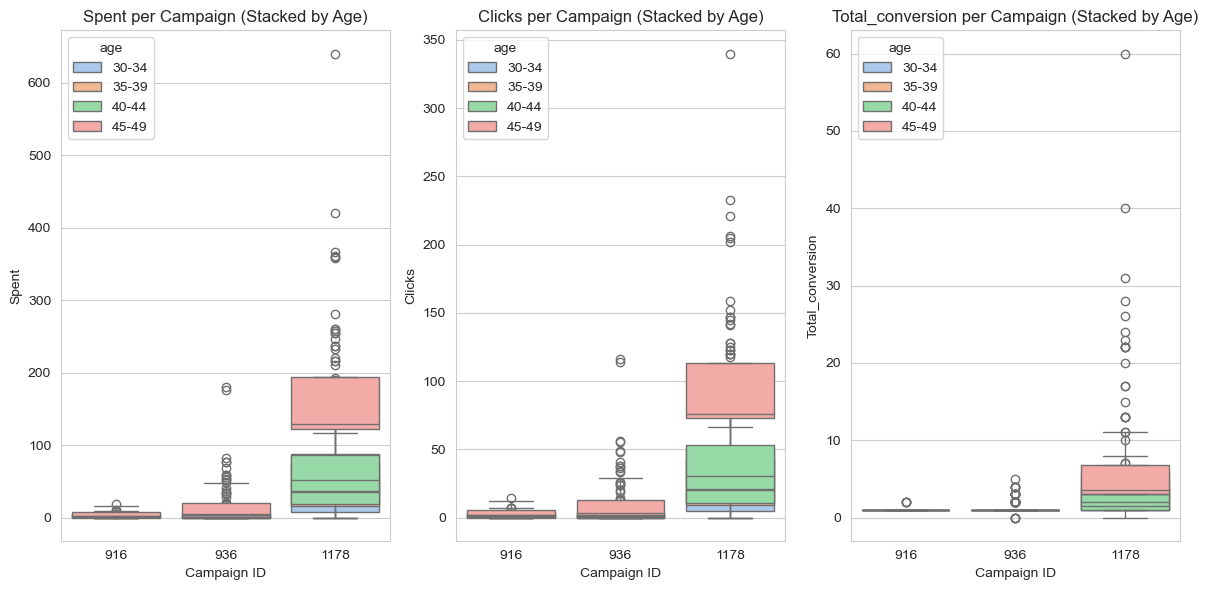

In [18]:
# Define pastel colors for different age groups
pastel_age_colors = sb.color_palette("pastel", n_colors=len(data['age'].unique()))

# Create subplots for each metric
fig, axes = plt.subplots(1, len(metrics), figsize=(12, 6))

# Loop through each metric and create a stacked barplot by age
for i, metric in enumerate(metrics): 
    sb.boxplot(data=data, x='campaign_id', y=metric, hue='age', ax=axes[i], 
               dodge=False, palette=pastel_age_colors)  # Stacked bars by age
    
    axes[i].set_title(f"{metric.capitalize()} per Campaign (Stacked by Age)")
    axes[i].set_xlabel("Campaign ID")
    axes[i].set_ylabel(metric.capitalize())

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Campaign Performance Analysis by Age Group

1. Campaign 1178 has highest variance and in ad spent across age groups 
2. Age **45-49** age group (remember this gorup is largely F users) has highest spend across all campaigns, and has the highest conversion 
3. The presence of extreme outliers in all three metrics suggest a skewed distribution : while som eusers engage heavily some may not. 
4. More investigation/ refinement towards targeting **45-49** age groups as they are the most engaged and likely to convert. 

The **Click-Through Rate (CTR)** is calculated as:

\[$$CTR = \frac{\text{Clicks}}{\text{Impressions}} \times 100$$\]

This represents the percentage of users who clicked on an ad after seeing it. This is a KPI that measures enagement effectiveness.


In [19]:
data['CTR']= (data['clicks']/data['impressions']) * 100

## A/B test between Campaigns on CTR

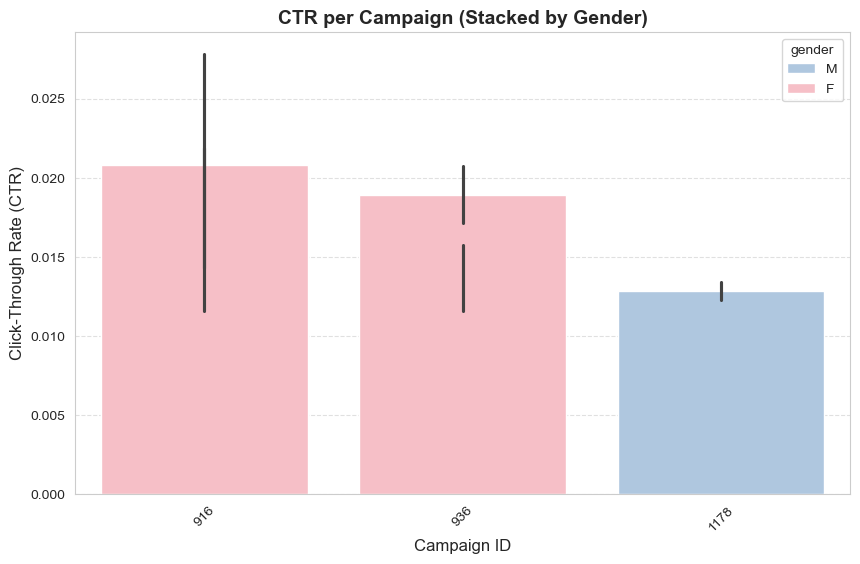

In [20]:
plt.figure(figsize=(10, 6))

# Create stacked bar chart for CTR per gender
sb.barplot(data=data, x='campaign_id', y='CTR', hue='gender', 
           dodge=False, palette=pastel_colors)

# Improve aesthetics
plt.title("CTR per Campaign (Stacked by Gender)", fontsize=14, fontweight='bold')
plt.xlabel("Campaign ID", fontsize=12)
plt.ylabel("Click-Through Rate (CTR)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show plot
plt.show()

Checking for Normalcy using Shapiro-Wilk 

In [21]:
for campaign in campaign_ids:
    stat, p_value = stats.shapiro(data[data["campaign_id"] == campaign]["CTR"])
    print(f"Campaign {campaign}: Shapiro-Wilk p-value = {p_value:.4f}")

Campaign 916: Shapiro-Wilk p-value = 0.0001
Campaign 936: Shapiro-Wilk p-value = 0.0000
Campaign 1178: Shapiro-Wilk p-value = 0.0000


In [22]:
kruskal_stat, kruskal_p = stats.kruskal(
    *[data[data["campaign_id"] == cid]["CTR"] for cid in campaign_ids]
)
print(f"Kruskal-Wallis test p-value = {kruskal_p:.4f}")

if kruskal_p < 0.05:
    print("There is a significant difference in CTR between campaigns.")
else:
    print("No significant difference in CTR between campaigns.")

Kruskal-Wallis test p-value = 0.0049
There is a significant difference in CTR between campaigns.


In [23]:
# Compute CTR, Variance (Delta Method) for each campaign
campaign_stats = data.groupby("campaign_id").agg(
    CTR_mean=("CTR", "mean"),
    clicks_sum=("clicks", "sum"),
    impressions_sum=("impressions", "sum")
).reset_index()

# Delta method approximation for variance
campaign_stats["CTR_variance"] = (campaign_stats["CTR_mean"] * (1 - campaign_stats["CTR_mean"])) / campaign_stats["impressions_sum"]

campaign_stats["CTR_std_error"] = np.sqrt(campaign_stats["CTR_variance"])

# Print estimated CTR means and standard errors
print(campaign_stats)
def z_test(ctr1, ctr2, se1, se2):
    z_score = (ctr1 - ctr2) / np.sqrt(se1**2 + se2**2)
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score))) # Two tailed test
    return z_score, p_value

campaign_pairs = [(campaign_stats.iloc[i], campaign_stats.iloc[j]) for i in range(len(campaign_stats)) for j in range(i+1, len(campaign_stats))]

for c1, c2 in campaign_pairs:
    z, p = z_test(c1["CTR_mean"], c2["CTR_mean"], c1["CTR_std_error"], c2["CTR_std_error"])
    print(f"Comparison: Campaign {c1['campaign_id']} vs Campaign {c2['campaign_id']}")
    print(f"Z-score: {z:.4f}, P-value: {p:.4f}")
    if p < 0.05:
        print("Significant difference in CTRs")
    else:
        print("No significant difference in CTRs")
    print("-" * 50)

  campaign_id  CTR_mean  clicks_sum  impressions_sum  CTR_variance  \
0        1178  0.012854        9577       69902476.0  1.815190e-10   
1         916  0.018015         113         482925.0  3.663133e-08   
2         936  0.016502        1984        8128187.0  1.996657e-09   

   CTR_std_error  
0       0.000013  
1       0.000191  
2       0.000045  
Comparison: Campaign 1178 vs Campaign 916
Z-score: -26.8982, P-value: 0.0000
Significant difference in CTRs
--------------------------------------------------
Comparison: Campaign 1178 vs Campaign 936
Z-score: -78.1568, P-value: 0.0000
Significant difference in CTRs
--------------------------------------------------
Comparison: Campaign 916 vs Campaign 936
Z-score: 7.6993, P-value: 0.0000
Significant difference in CTRs
--------------------------------------------------


Campaign 1178 has a significantly lower CTR than 916 and 936. This suggests that its targeting, messaging, or ad design may not be as effective. Budget reccomendations are suggested to optimize spending and CTR.

Futher Analysis is to be done on between Gender Differences in CTR given the uneveness of gender between the capaign ids.

## A/B test between Gender on CTR

<Axes: xlabel='gender', ylabel='CTR'>

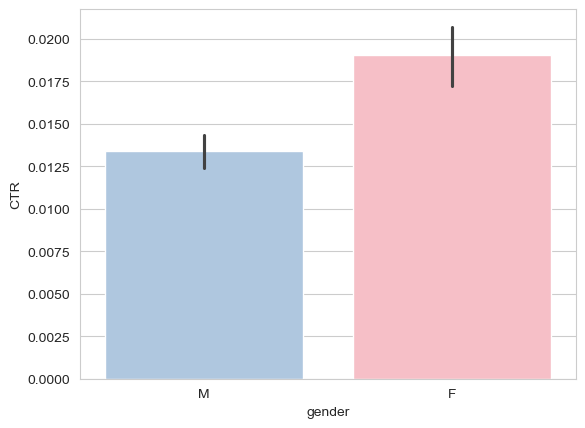

In [24]:
sb.barplot(data, x='gender', y = 'CTR', hue='gender' ,palette=pastel_colors)

In [25]:
male_ctr = data[data['gender'] == 'M']['CTR']
female_ctr = data[data['gender'] == 'F']['CTR']

stat_m, p_m = stats.shapiro(male_ctr)
stat_f, p_f = stats.shapiro(female_ctr)

print(f"Shapiro-Wilk Test for Male CTR: p-value = {p_m}")
print(f"Shapiro-Wilk Test for Female CTR: p-value = {p_f}")

Shapiro-Wilk Test for Male CTR: p-value = 3.988559358954938e-18
Shapiro-Wilk Test for Female CTR: p-value = 1.8043290664073437e-13


Failed Normalcy Test, therefore use ManUWitney as test statistic.

In [26]:
# Extract CTR values for each gender
male_ctr = data[data['gender'] == 'M']['CTR']
female_ctr = data[data['gender'] == 'F']['CTR']

# Perform Mann-Whitney U test
u_stat, p_value = stats.mannwhitneyu(male_ctr, female_ctr, alternative='two-sided')

print(f"Mann-Whitney U Test Results: U-statistic = {u_stat}, p-value = {p_value}")

# Interpretation
if p_value < 0.05:
    print("The CTR difference between male and female is statistically significant.")
else:
    print("No significant difference in CTR between male and female.")


Mann-Whitney U Test Results: U-statistic = 50333.5, p-value = 1.0952793997452783e-08
The CTR difference between male and female is statistically significant.


### CTR Analysis by Gender

1. Females(F) have significantly higher CTR than Males (M), suggesting that they egage more with ad content compared with Males.
2. Despite higher ad spend and clicks from male audiences in previous graphs, they convert less effectively in terms of CTR.
3. Female users may be more receptive to the campaign messaging, leading to higher engagement despite lower total ad spend.
4. Campaign optimizations should focus on improving male engagement, as they represent a **costly but inefficient audience**.
5. Increased spending on Female user ad campaigns could tap into the higher Female CTR market.  

## Brief Segmentation Analysis on Interest Ids

In [27]:
# Convert wide format to long format (each interest column becomes a row)
data_long = data.melt(id_vars=['ad_id', 'campaign_id', 'clicks', 'impressions', 'total_conversion', 'gender'],
                      value_vars=['interest1', 'interest2', 'interest3'],
                      var_name='interest_type',
                      value_name='interest')

# Group by interest and compute CTR & Conversion Rate
interest_analysis = data_long.groupby('interest').agg(
    impressions_sum=('impressions', 'sum'),
    clicks_sum=('clicks', 'sum'),
    total_conversion_sum=('total_conversion', 'sum'),
    gender_sum=('gender', 'sum')
).reset_index()

# Compute CTR and Conversion Rate
interest_analysis['CTR'] = (interest_analysis['clicks_sum'] / interest_analysis['impressions_sum']) * 100
interest_analysis['Conversion Rate'] = (interest_analysis['total_conversion_sum'] / interest_analysis['clicks_sum']) * 100


In [28]:
interest_analysis

,interest,impressions_sum,clicks_sum,total_conversion_sum,gender_sum,CTR,Conversion Rate
0,2,1329050.0,229,32.0,MMFMMMFMMMMMMMMMMM,0.017230,13.973799
1,3,367910.0,65,7.0,FMMMM,0.017667,10.769231
2,4,215564.0,32,12.0,MMFMMMM,0.014845,37.500000
3,5,884901.0,155,15.0,MMMMM,0.017516,9.677419
4,6,272838.0,51,6.0,MMMFM,0.018692,11.764706
5,7,2560915.0,379,66.0,MMFMFMFMMFMMMMMMMMMMMMMFMMMM,0.014799,17.414248
6,8,441704.0,72,8.0,MMMMMM,0.016301,11.111111
7,9,755668.0,118,12.0,FMFMMMMFMM,0.015615,10.169492
8,10,11280033.0,1656,217.0,FFMMMFFFMFFMMMFFFFFMFMMMMMMFMMFFFFFFMFFMMMFFFF...,0.014681,13.103865
9,11,5082385.0,722,90.0,MFMMMFMMMMMFFFMMMFFFFMMMMM,0.014206,12.465374


/var/folders/vr/thykdwqx0d72q7nckyxdl0zr0000gn/T/ipykernel_6032/3549202209.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=interest_analysis.sort_values(by='CTR', ascending=False), x='interest', y='CTR', palette="viridis")


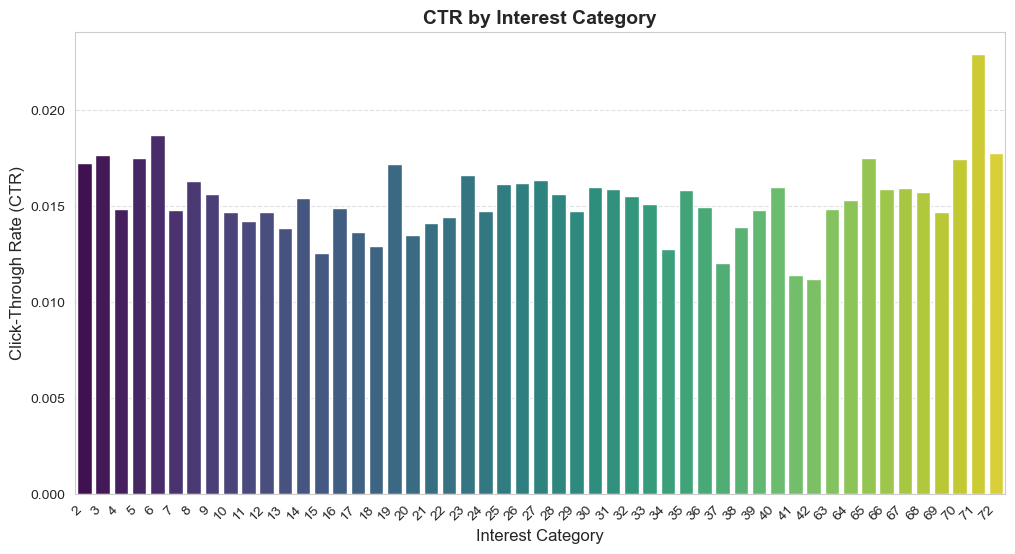

In [29]:
plt.figure(figsize=(12, 6))
sb.barplot(data=interest_analysis.sort_values(by='CTR', ascending=False), x='interest', y='CTR', palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Interest Category", fontsize=12)
plt.ylabel("Click-Through Rate (CTR)", fontsize=12)
plt.title("CTR by Interest Category", fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [30]:
interest_analysis.sort_values(by='CTR', ascending=False).head()

,interest,impressions_sum,clicks_sum,total_conversion_sum,gender_sum,CTR,Conversion Rate
49,71,379892.0,87,11.0,FMFM,0.022901,12.643678
4,6,272838.0,51,6.0,MMMFM,0.018692,11.764706
50,72,90021.0,16,2.0,MM,0.017774,12.500000
1,3,367910.0,65,7.0,FMMMM,0.017667,10.769231
3,5,884901.0,155,15.0,MMMMM,0.017516,9.677419


Interest 71 showed the most CTR, by far. Conducting a demographic breakdown of users engaging in Interest 71 to understand their behavioral patterns. Exploring interest 71 and examining why it may have such a high CTR may be an opportunity to targert this specific interest for increased performance.

## Key Takeaways
1. **Females** engage more effectively with the ads, making them a higher-value audience. This suggesgts Budget reallocation for femaile target ads.
2. **Male** engagement needs optimization—high spend with lower returns suggests inefficiencies.
